In [62]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy
import glob
import xml.etree.ElementTree as ET


In [63]:
image_dirs = glob.glob("pangu/images/*.png")

data = {}

for image_dir in image_dirs:
    image_id = image_dir.split("/")[-1].split("_")[0]
    if image_id not in list(data.keys()):
        data[image_id] = {"dirs": [image_dir]}
    else:    
        data[image_id]['dirs'].append(image_dir)

In [64]:
def extract_ellipses(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    images = {}

    for image in root.findall('image'):
        image_name = image.get('name').split('_')[0]

        ellipses = []
        
        for ellipse in image.findall('ellipse'):
            cx = float(ellipse.get('cx'))
            cy = float(ellipse.get('cy'))
            rx = float(ellipse.get('rx'))
            ry = float(ellipse.get('ry'))
            rotation = float(ellipse.get('rotation') if 'rotation' in ellipse.attrib else 0)

            ellipses.append((cx, cy, rx, ry, rotation))

        images[image_name] = ellipses


    return images

# Usage example
xml_file = './pangu/annot/annotations.xml'  # replace with your XML file path
annot_ellipses = extract_ellipses(xml_file)


In [65]:
for image_id, ellipses in annot_ellipses.items():
    data[image_id]['ellipses'] = ellipses

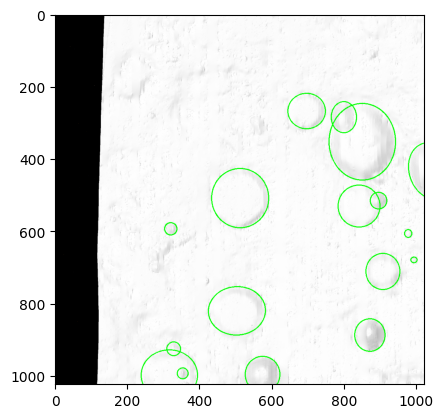

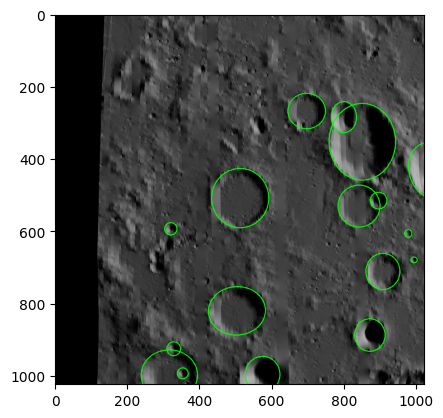

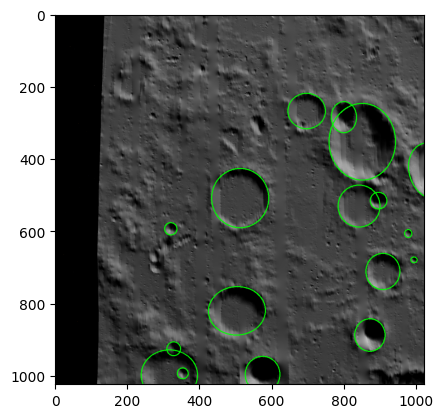

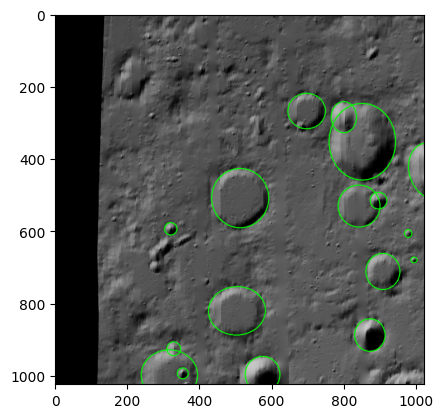

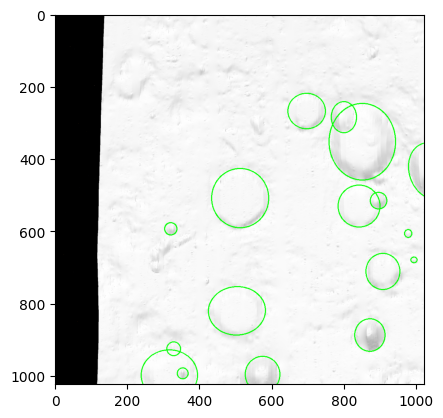

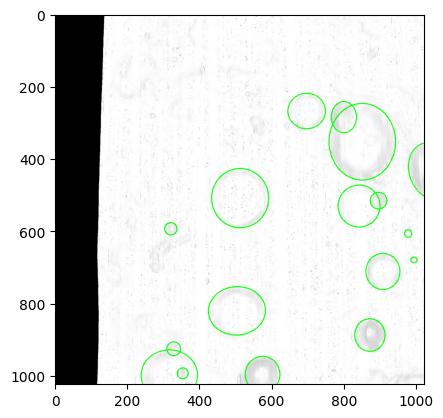

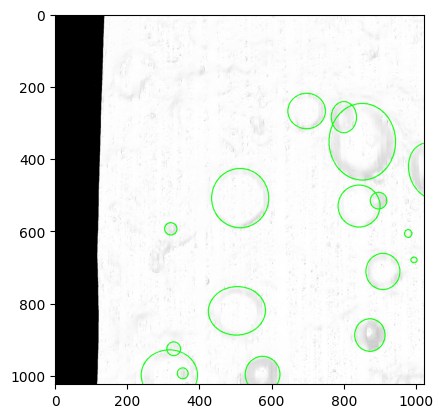

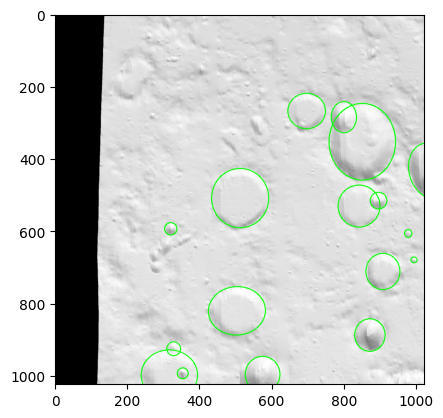

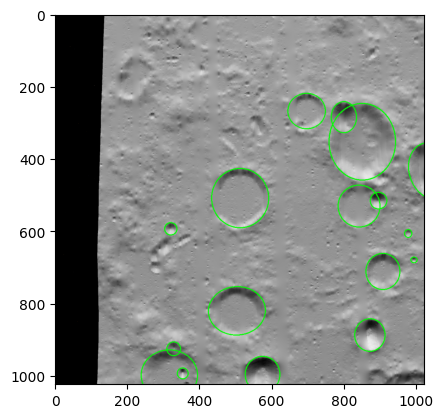

KeyboardInterrupt: 

In [66]:
for image_id, image_data in data.items():
    for i in range(len(image_data['dirs'])):
        image = cv2.imread(image_data['dirs'][i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ellipses = image_data['ellipses']
        for ellipse in ellipses:
            cx, cy, rx, ry, rotation = ellipse
            cv2.ellipse(image, (int(cx), int(cy)), (int(rx), int(ry)), rotation, 0, 360, (0, 255, 0), 2)
        plt.imshow(image)
        plt.show()